# Анализ жилой недвижимости в Санкт-Петербурге и соседних населенных пунктах

<b> Цель исследования: изучить факторы, влияющие на стоимость недвижимости для дальнейшего построения модели определения справедливой рыночной стоимости <br><br> Ход исследования: <br>1. Изучение данных, обработка пропущенных и аномальных значений, изменение типов данных <br> 2. Добавление дополнительных параметров для дальнейшего анализа: цена квадратного метра, день, месяц, год публикации объявления, тип этажа квартиры <br> 3. Изучение исходных данных и их распределения общей выборке: площади квартир (общая, жилая, кухня), этажность, удаленность от парков, центра города, аэропорта, средняя продолжительность продажи. <br> 4. Оценка факторов, влияющих на конечную стоимость жилья: площадь по типам, этажность, количество комнат. <br> 5. Выявление наиболее частых локаций в объявлениях, подсчет средней стоимости кв м по ним <br> 6. Оценка стоимости жилья в Санкт-Петербурге в зависимости от стоимости квадратного метра <br> 7. Формулирование общих выводов и рекомендаций

**Описание данных**: <br> airports_nearest — расстояние до ближайшего аэропорта в метрах (м) <br>
balcony — число балконов <br>
ceiling_height — высота потолков (м) <br>
cityCenters_nearest — расстояние до центра города (м) <br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия) <br>
first_day_exposition — дата публикации <br>
floor — этаж <br>
floors_total — всего этажей в доме <br>
is_apartment — апартаменты (булев тип) <br>
kitchen_area — площадь кухни в квадратных метрах (м²) <br>
last_price — цена на момент снятия с публикации <br>
living_area — жилая площадь в квадратных метрах (м²) <br>
locality_name — название населённого пункта <br>
open_plan — свободная планировка (булев тип) <br>
parks_around3000 — число парков в радиусе 3 км <br>
parks_nearest — расстояние до ближайшего парка (м) <br>
ponds_around3000 — число водоёмов в радиусе 3 км <br>
ponds_nearest — расстояние до ближайшего водоёма (м) <br>
rooms — число комнат <br>
studio — квартира-студия (булев тип) <br>
total_area — общая площадь квартиры в квадратных метрах (м²) <br>
total_images — число фотографий квартиры в объявлении <br>

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
#импортируем pandas и matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#чтение файла и вывод основной информации о его содержимом
data = pd.read_csv('https://raw.githubusercontent.com/dinomash/real_estate_analysis/main/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**В представленной информации имеются пропуски, так как максимальное число строк 23699, а у некоторых колонок данные значения значительно меньше**

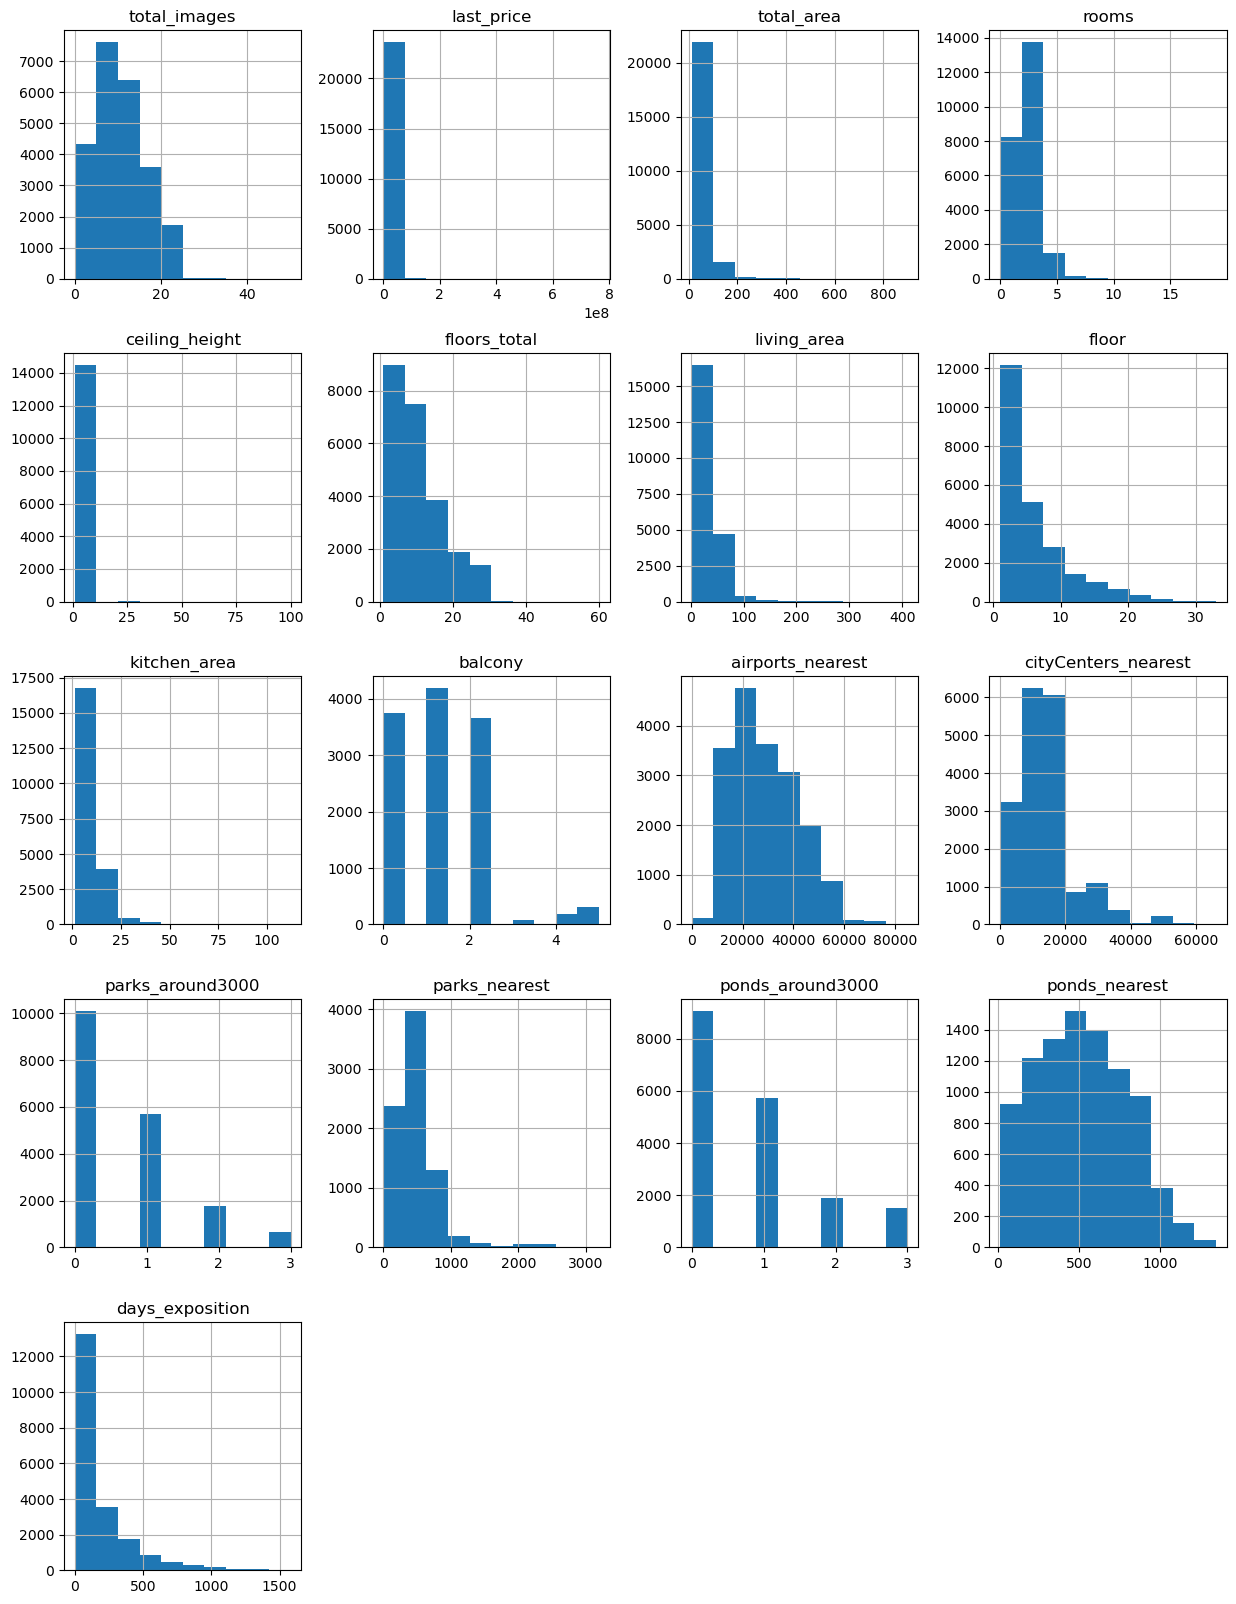

In [4]:
#построим гистрограмму для всех числовых столбцов
data.hist(figsize=(15, 20));
plt.show()

### Предобработка данных

#### Удаление пропусков

In [5]:
#производим подсчет пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#удалим строки с пропусками по количеству этажей в доме, так как их всего 86 и они незначительно повлияют на выборку,
#но при этом заполнение их медианным значением будет некорректным
data.dropna(subset=['floors_total'], inplace=True)

In [7]:
#обработаем значение ceiling_height: заменим медианным значением т.к. большинство домов имеет типовую застройку
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
#для удаления пропусков по kitchen_area и living_area мы будем использовать общую площадь помещений, в которой пропуски отсутствуют
#для начала в общей площади применим разбивку по категориям, добавив столбец total_area_category
def categorize_total_area(total_area):
    if total_area <= 20:
        return 'very_small'
    elif 31 <= total_area <= 50:
        return 'small'
    elif 51 <= total_area <= 80:
        return 'normal'
    elif 81 <= total_area <= 150:
        return 'big'
    else:
        return 'very_big'
    
data['total_area_category'] = data['total_area'].apply(categorize_total_area)  

#обработаем пропуски в living_area и в kitchen_area
for i in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == i) & (data['living_area'].isna()), 'living_area'] = \
    (data.loc[(data['total_area_category'] == i), 'living_area'].median())
    data.loc[(data['total_area_category'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    (data.loc[(data['total_area_category'] == i), 'kitchen_area'].median())

In [9]:
#обработаем колонку is_apartment: найдем общее количество значений
data.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,...,2267,2710,2103,2104,2104,928,2104,1046,2462,2725
True,50,50,50,50,50,50,50,50,50,50,...,31,50,41,43,43,19,43,30,38,50


**В наших данных большая часть из представленной информации по апартаментам не заполнена. Данные пропуски могут быть связаны с тем, что владельцы жилой недвижимости, которая не является апартаментами, просто не заполняют данное поле при публикации объявления. Общее количество заполненных значений показывает, что перевес в данных в пользу не апартаментов (2725 против 50). Следовательно, заполним пропуски значением False.**

In [10]:
#заполняем пропуски в is_apartment
data['is_apartment'] = data['is_apartment'].fillna('False')

In [11]:
#заполняем пропуски в количестве балконов исходя из того, что если количество балконов не указано, следовательно их нет
data['balcony'] = data['balcony'].fillna(0)

In [12]:
#удалим отсутсвующие значения в locality_name так как без указания города нам не нужны указанные данные
data.dropna(subset=['locality_name'], inplace=True)

**Количество пропущенных значений в airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 примерно одинаковое и находится на уровне 5518. Необходимо выяснить не пересекаются ли данные объекты и какая между ними связь (возможно расположены в одном городе, в котором нет аэропорта или выраженного центра)**

In [13]:
#проведем анализ есть ли пересечения по нулевым строкам в данных категориях
data[data['airports_nearest'].isna() & data['cityCenters_nearest'].isna() & data['parks_around3000'].isna() \
    & data['ponds_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,very_big
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,small
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,normal
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,normal
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,19.00,2,False,...,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,...,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,very_big
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,normal
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal


**В результате по указанным категориям количество незаполненных строк по всем категориям совпадает и составляет 5518. Однако, они все не находятся в одном городе. Таким образом, можно сделать вывод, что по 5 тыс. жилья не была определена геолокация.  <br> 
Для заполнения пропусков по близости к центру и аэропортам была произведена попытка выполнить замену пропусков медианными значениями, однако при заполнении возникла ошибка - недостаточно данных для определения медианы. В связи с этим, данные значения останутся пропущенными.**

**Также отмечено значительное количество пропусков в категориях расстояний до парков и прудов: parks_nearest и ponds_nearest (около 15 тыс.). При этом количество пропусков категориях подсчета близлежащих прудов и парков в три раза меньше (5 тыс.). Данный дисбаланс объясняется следующим: в некоторых категориях подсчета парков и прудов при отсутствующих значениях расстояния до них стоит не пропуск, а ноль. Следовательно, для целей анализа и приведения к единообразию, можно также заполнить пропуски в parks_around3000 и ponds_around3000 нолями**

In [14]:
#заменим значения parks_around3000, ponds_around3000 нулями, если значение расстояния до них не определено
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna()), 'ponds_around3000'] = 0
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna()), 'parks_around3000'] = 0

In [15]:
#в связи с отсутствием количества дней показа объявления по некоторым объектам, заменим данное значение на медианное
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [16]:
#проверяем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
total_area_category         0
dtype: int64

**Вывод по разделу обработки пропусков:**
- В ходе анализа было выявлено, что имеются незаполненные строки по городам. Так как заполнить средним значением их не представляется возможным, а их количество незначительное, то данные строки были удалены. 
- Пропуски по жилой площади и площади кухни могли возникнуть из-за отсутствия информации у владельцев о четком разделении жилья на кухню и жилую зону, так как в некоторых случаях возможно наличия совмещенных кухонь с гостиных.
- Незаполненные данные по принадлежности жилья к апартаментам могли возникнуть из-за невнимательности или отсутствия понимания данной категории у заполняющих объявление людей. 
- Пропуски по высоте потолков могли возникнуть из-за отсутствия данной информации у владельцев помещений. 
- Значительное количество пропусков по расстоянию до аэропорта, центра города, прудов и парков могли возникнуть как из-за некорректной работы системы геопозиционирования, так и из-за неправильного адреса, вбитого при заполнении объявления.

#### Изменение типов данных

In [17]:
#проверим все типы данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [18]:
#заменим значения float на целочисленные int по категориям этаж, количество балконов, количество прудов и 
#парков в радиусе 3 км, а также количество дней размещения объявления т.к. все указанные значения не могут быть дробными

for i in ['floor', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'floors_total']:
    data[i] = data[i].astype('int')

In [19]:
#также исходя из вводных условий is_apartment является булевым типом, проведем преобразование
data['is_apartment'] = data['is_apartment'].astype('bool')

In [20]:
#в данных дата представлена объектом, а не типом datetime, изменим тип данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод по изменению типов: произведена замена дробных значений на целочисленные, по категориям, по которым невозможно дробное значение - этаж, количество балконов, количество парков и прудов в радиусе 3 км, день показа объявления. Также изменен тип принадлежности жилья к апартаментам на булев как и предполагалось изначально при сборе данных. Формат даты также был изменен со строчного на специальный формат для дат.**

#### Удаление дубликатов

In [22]:
#проанализируем количество явных дубликатов в данных
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Приступим к обработке неявных дубликатов.

In [23]:
#выведем все уникальные значения, предварительно приведя названия к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [24]:
#выведем количество уникальных значений до обработки
len(data['locality_name'].unique())

364

In [25]:
#удаляем обозначения типов населенных пунктов, чтобы привести все названия к единообразию
for i in data['locality_name'].unique().tolist():
    data.loc[data['locality_name'] == i, 'locality_name'] = i.split()[-1]

In [26]:
#проверяем получившиеся уникальные значения
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'бор', 'гатчина', 'фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'девяткино', 'металлострой', 'лебяжье',
       'сиверский', 'молодцово', 'кузьмоловский', 'ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск', 'оржицы',
       'кальтино', 'романовка', 'бугры', 'рощино', 'кириши', 'луга',
       'волосово', 'отрадное', 'павлово', 'оредеж', 'копорье',
       'молодёжное', 'тихвин', 'победа', 'нурма', 'синявино', 'тосно',
       'стрельна', 'бокситогорск', 'александровская', 'лопухинка',
       'пикалёво', 'терв

In [27]:
#выведем количество уникальных значений после обработки
len(data['locality_name'].unique())

294

**Вывод по удалению дубликатов: в ходе анализа были удалены неявные дубликаты в названии населенных пунктов. Данная ошибка могла произойти в связи с отсутствием автозаполнения (выпадающего списка) на сайте объявлений, поэтому пользователи самостоятельно вводили название и могли путать тип населенного пункта, а также использовать буквы е и ё**

#### Корректировка аномальных значений

In [28]:
#получим список названий колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_category'],
      dtype='object')

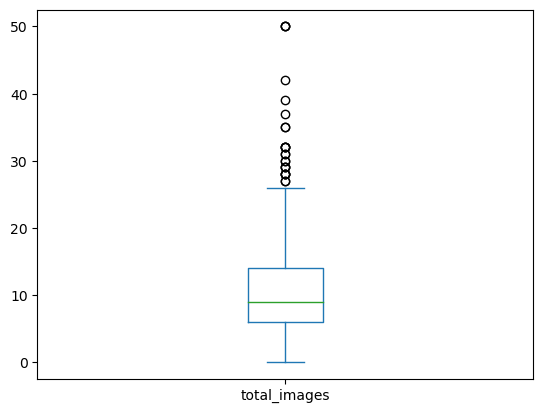

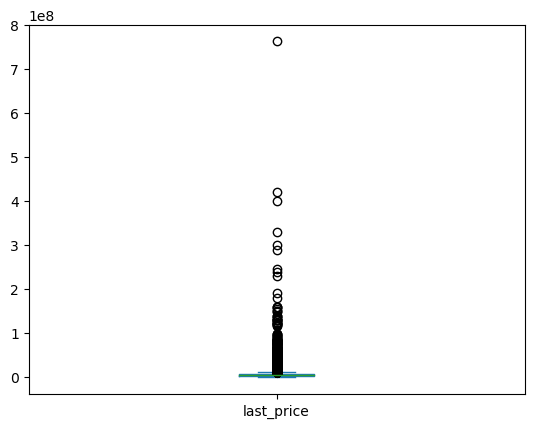

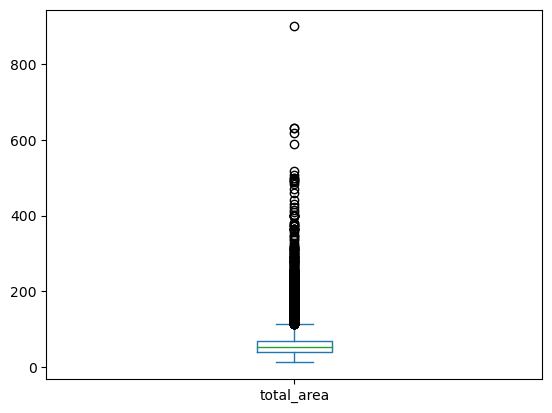

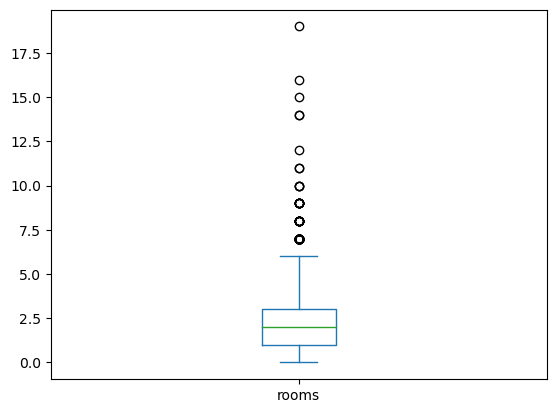

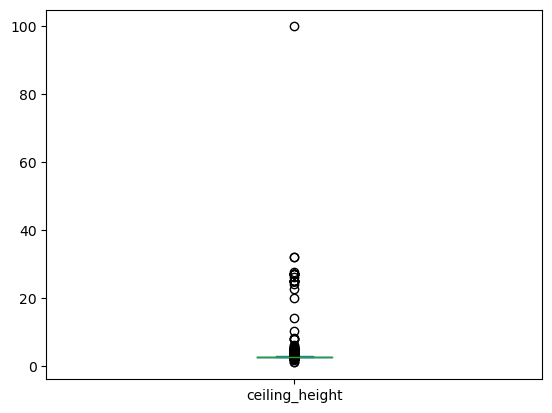

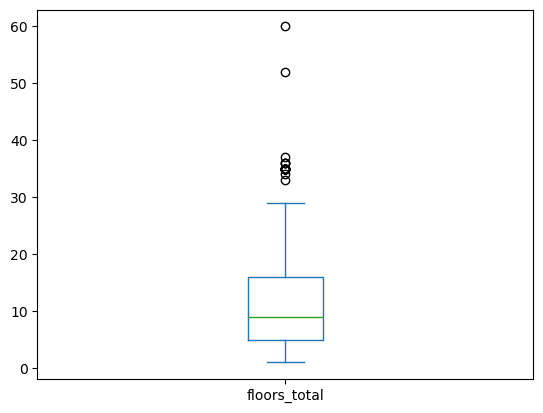

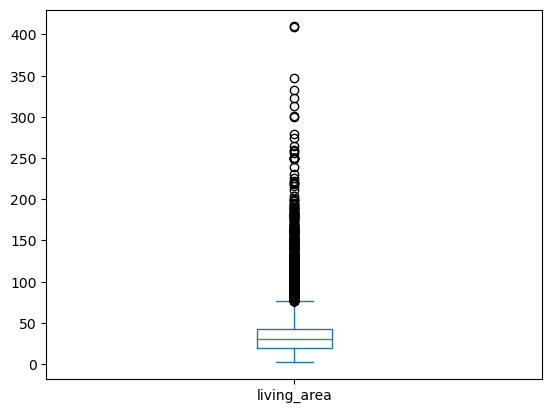

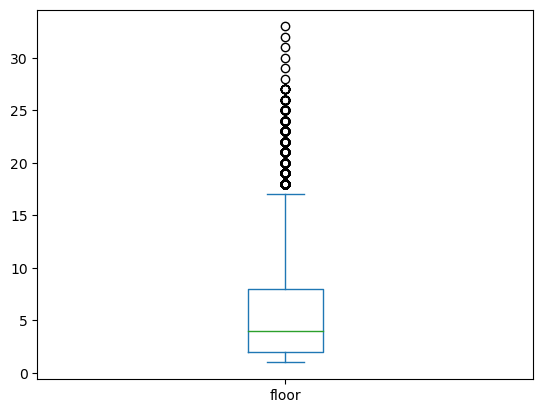

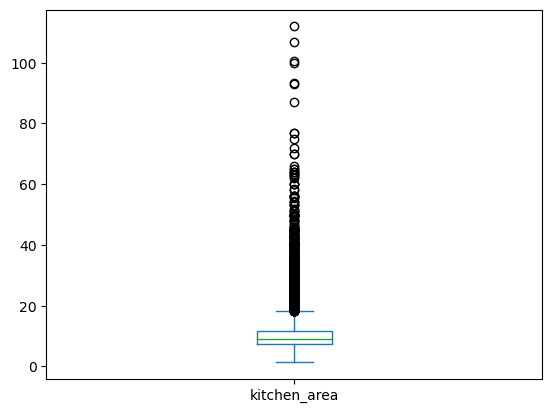

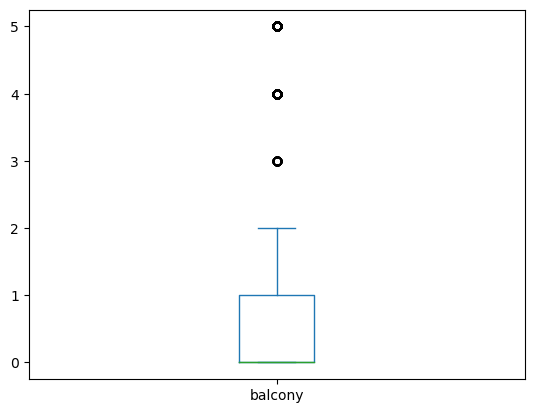

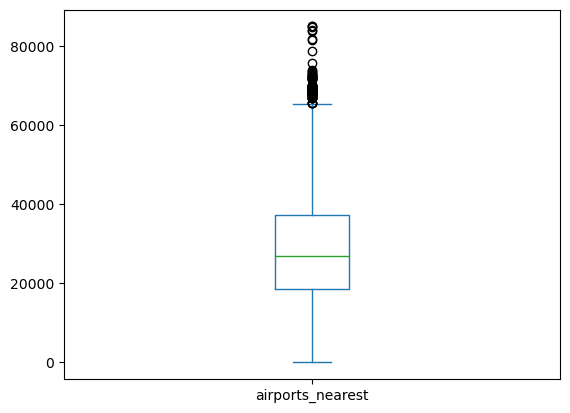

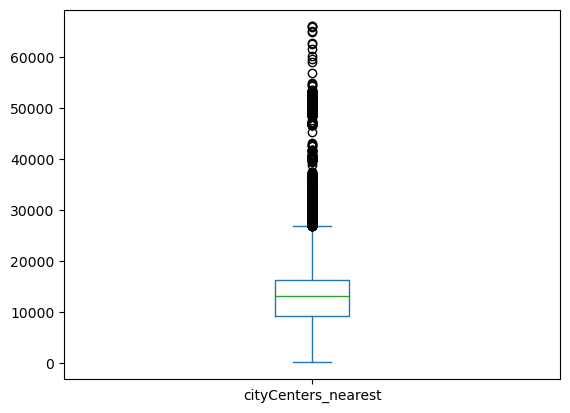

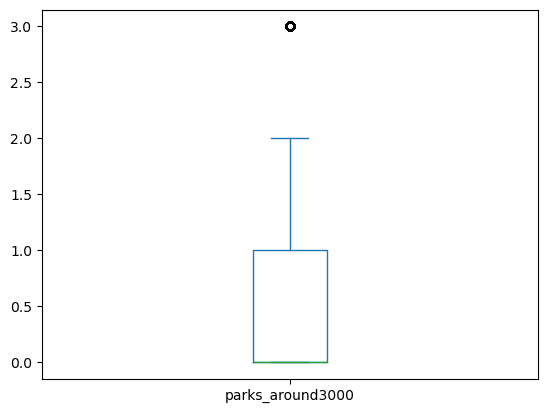

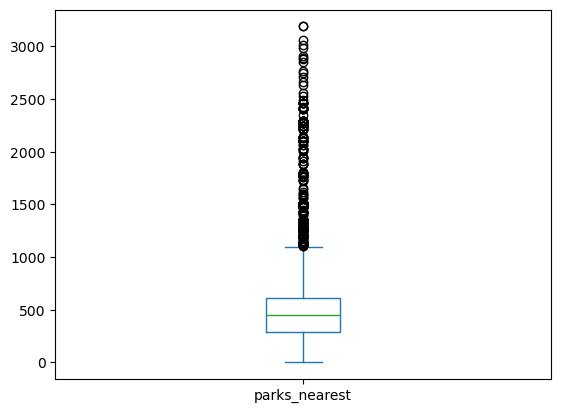

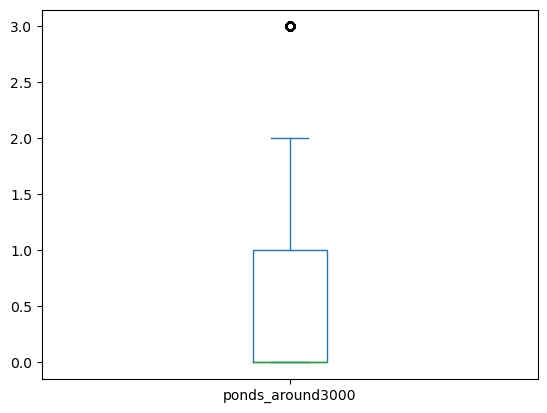

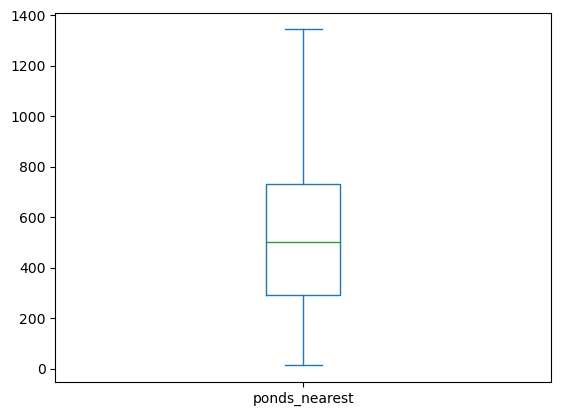

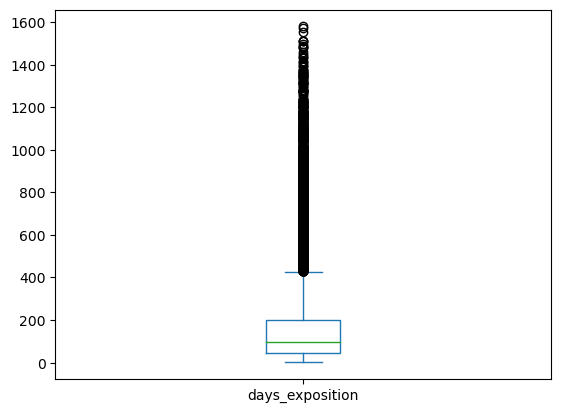

In [29]:
#для выявления аномальных значений по столбцам построим боксплоты
for column in ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']:
    data[column].plot(kind='box')
    plt.show()
    

In [30]:
#разберемся со странным графиком последней цены: для этого выведем уникальные значения и найдем минимум
sorted(data['last_price'].unique())

[12190.0,
 430000.0,
 440000.0,
 450000.0,
 470000.0,
 480000.0,
 490000.0,
 500000.0,
 520000.0,
 530000.0,
 550000.0,
 560000.0,
 565000.0,
 580000.0,
 585000.0,
 590000.0,
 600000.0,
 620000.0,
 630000.0,
 650000.0,
 660000.0,
 680000.0,
 690000.0,
 700000.0,
 710000.0,
 720000.0,
 730000.0,
 740000.0,
 750000.0,
 760000.0,
 770000.0,
 777000.0,
 780000.0,
 790000.0,
 799000.0,
 800000.0,
 820000.0,
 850000.0,
 860000.0,
 869000.0,
 870000.0,
 880000.0,
 890000.0,
 900000.0,
 910000.0,
 920000.0,
 945750.0,
 950000.0,
 965780.0,
 970000.0,
 980000.0,
 990000.0,
 995000.0,
 999000.0,
 999999.0,
 1000000.0,
 1010000.0,
 1020000.0,
 1030000.0,
 1050000.0,
 1060000.0,
 1070000.0,
 1080000.0,
 1090000.0,
 1099000.0,
 1100000.0,
 1110000.0,
 1130000.0,
 1150000.0,
 1170000.0,
 1180000.0,
 1190000.0,
 1199000.0,
 1200000.0,
 1220000.0,
 1230000.0,
 1240000.0,
 1249000.0,
 1250000.0,
 1260000.0,
 1270000.0,
 1280000.0,
 1290000.0,
 1300000.0,
 1310000.0,
 1315000.0,
 1320000.0,
 1330000.0,


In [31]:
#минимальная цена 12190 значительно выбивается из общего разброса цен, выведем какая именно недвижимость скрывается под данной ценой и определим ее реалистичность
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,0,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8,big


In [32]:
#квартира площадью 109 квадратных метров вряд ли будет стоить 12 тыс., следовательно в данных имеется ошибка и можно удалить строку
data = data[data['last_price'] != 12190]

In [33]:
#выведем максимумы по ценам 
sorted(data['last_price'].unique(), reverse=True)

[763000000.0,
 420000000.0,
 401300000.0,
 330000000.0,
 300000000.0,
 289238400.0,
 245000000.0,
 240000000.0,
 230000000.0,
 190870000.0,
 180000000.0,
 160000000.0,
 159984000.0,
 159000000.0,
 155000000.0,
 150000000.0,
 148000000.0,
 140000000.0,
 135000000.0,
 131000000.0,
 130278280.0,
 130000000.0,
 125000000.0,
 124480000.0,
 124350000.0,
 124000000.0,
 122000000.0,
 120000000.0,
 119000000.0,
 118000000.0,
 115490000.0,
 99000000.0,
 98000000.0,
 96000000.0,
 95000000.0,
 91500000.0,
 91075000.0,
 90000000.0,
 88000000.0,
 87000000.0,
 86738800.0,
 85000000.0,
 84382000.0,
 84000000.0,
 83820000.0,
 83000000.0,
 82400000.0,
 82000000.0,
 81960000.0,
 80000000.0,
 79339000.0,
 79000000.0,
 77612080.0,
 77349000.0,
 77000000.0,
 76837000.0,
 75000000.0,
 74000000.0,
 73900000.0,
 73884056.0,
 72375000.0,
 72000000.0,
 71000000.0,
 68500000.0,
 68000000.0,
 67000000.0,
 66571000.0,
 66500000.0,
 65850000.0,
 65138176.0,
 65000000.0,
 64990000.0,
 64900000.0,
 64500000.0,
 639000

In [34]:
#также и цена 763 млн.руб. значительно выбивается из общего уровня цен - так, самая дорогая недвижимость после этой оценивается практически в 1,5
#раза дешевле, чем данный объект. Можно сделать вывод, что мы имеем дело с уникальным объектом и для общей выборки его удаление скажется положительно (уберет выбросы)
data = data[data['last_price'] != 763000000]

In [35]:
#разберемся с выбросами по rooms
sorted(data['rooms'].unique(), reverse=True)

[19, 16, 15, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [36]:
#выведем объекты с большим количеством комнат, чтобы посмотреть является ли он это количество аномальным
data.query('rooms in [19, 16, 15, 14, 12, 11]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,True,...,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,95,very_big
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,True,...,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435.0,418,very_big
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14,very_big
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,True,...,0,санкт-петербург,21469.0,1015.0,1,686.0,2,66.0,813,very_big
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5,264.5,2,True,...,0,санкт-петербург,19497.0,3574.0,0,NaN,2,548.0,114,very_big
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,True,...,1,санкт-петербург,23575.0,4142.0,1,516.0,0,NaN,1365,very_big
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106,very_big
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4,168.3,2,True,...,0,санкт-петербург,21104.0,2054.0,3,541.0,2,118.0,95,very_big


С учетом того, что объявлений с количеством комнат больше 10 оказалось всего 8 из 23 тыс. объявлений, то данные объекты можно удалить как аномальные (скорее всего такие объекты построены по индивидуальному заказу, имеют особенную планировку и являются единичными случаями, которые не подходят для поставленной задачи оценки факторов, влияющих на рыночную стоимость недвижимости)

In [37]:
#удалим выбивающиеся значения из датасета
data = data.query('rooms not in [19, 16, 15, 14, 12, 11]')

In [38]:
#проверим успешность удаления объектов с большим количеством комнат
data.query('rooms in [19, 16, 15, 14, 12, 11]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


In [39]:
#рассмотрим высоту потолков
sorted(data['ceiling_height'].unique(), reverse=True)

[100.0,
 32.0,
 27.5,
 27.0,
 26.0,
 25.0,
 24.0,
 22.6,
 20.0,
 14.0,
 10.3,
 8.3,
 8.0,
 6.0,
 5.8,
 5.6,
 5.5,
 5.3,
 5.2,
 5.0,
 4.9,
 4.8,
 4.7,
 4.65,
 4.5,
 4.45,
 4.4,
 4.37,
 4.3,
 4.25,
 4.2,
 4.19,
 4.15,
 4.14,
 4.1,
 4.06,
 4.0,
 3.98,
 3.95,
 3.93,
 3.9,
 3.88,
 3.87,
 3.86,
 3.85,
 3.84,
 3.83,
 3.82,
 3.8,
 3.78,
 3.76,
 3.75,
 3.7,
 3.69,
 3.68,
 3.67,
 3.66,
 3.65,
 3.63,
 3.62,
 3.6,
 3.59,
 3.58,
 3.57,
 3.56,
 3.55,
 3.54,
 3.53,
 3.52,
 3.51,
 3.5,
 3.49,
 3.48,
 3.47,
 3.46,
 3.45,
 3.44,
 3.42,
 3.4,
 3.39,
 3.38,
 3.37,
 3.36,
 3.35,
 3.34,
 3.33,
 3.32,
 3.31,
 3.3,
 3.29,
 3.28,
 3.27,
 3.26,
 3.25,
 3.24,
 3.23,
 3.22,
 3.21,
 3.2,
 3.18,
 3.17,
 3.16,
 3.15,
 3.14,
 3.13,
 3.12,
 3.11,
 3.1,
 3.09,
 3.08,
 3.07,
 3.06,
 3.05,
 3.04,
 3.03,
 3.02,
 3.01,
 3.0,
 2.99,
 2.98,
 2.97,
 2.96,
 2.95,
 2.94,
 2.93,
 2.92,
 2.91,
 2.9,
 2.89,
 2.88,
 2.87,
 2.86,
 2.85,
 2.84,
 2.83,
 2.82,
 2.81,
 2.8,
 2.79,
 2.78,
 2.77,
 2.76,
 2.75,
 2.74,
 2.73,
 2.72,
 2.71,


Согласно данным из интернета, средняя высота потолков в Санкт-Петербурге может достигать 3,3 метров, при этом возможны индивидуальные проекты с высотой 4-10 метра. Таким образом, высота потолков более 10м может быть опечаткой, заменим все на корректные значения.

In [40]:
#скорректируем значения больше 10м делением на 10
for height in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] > 10) & (data['ceiling_height'] == height)] = height/10

In [41]:
#обработаем аномальные значения по высоте зданий. Согласно данным из Интернета, наиболее высокое здание Санкт-Петербуга - Лахта-Центр, за ним\
#следует Лидер Тауэр - высота 42 этажа. Следовательно, все, что выше 42 этажей будет считаться аномалией
data.loc[data['floors_total'] >= 42]
#получили 2 значения - 52 и 60 этажей. В случае 60 этажей данная аномалия может быть опечаткой, так как квартира располагается на 4 этаже в Кронштаде (где отсутствуют высотные здания), 
#заменим общее количество этажей на 6
data.loc[data['floors_total'] == 60] = 6
#52 этажа можно отнести только в Лахта-Центру. Согласно данным из интернета, жилые квартиры в Лахта-Центре относятся к элитным квартирам и вряд ли когда-то будут продаваться.
#таким образом, цена в 3 млн.руб. для конкретного объекта является очень заниженной и скорее всего данные по этажам некорректны. Удалим данную строку
data = data.loc[data['floors_total'] != 52]

In [42]:
#проверим аномальные значения по жилой площади
data.loc[data['living_area'] > 250]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
660,3.0,49950000.0,483.9,2017-10-04 00:00:00,7.0,3.20,6.0,312.5,4.0,True,...,0.0,санкт-петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,very_big
1085,16.0,75000000.0,323.0,2017-07-10 00:00:00,5.0,4.00,5.0,255.7,4.0,True,...,0.0,санкт-петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0,very_big
4237,1.0,50000000.0,517.0,2017-10-14 00:00:00,7.0,2.65,4.0,332.0,3.0,True,...,0.0,санкт-петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,95.0,very_big
8018,20.0,84000000.0,507.0,2015-12-17 00:00:00,5.0,4.45,7.0,301.5,7.0,True,...,1.0,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,very_big
12401,20.0,91500000.0,495.0,2017-06-19 00:00:00,7.0,4.65,7.0,347.5,7.0,True,...,0.0,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0,very_big
12859,20.0,140000000.0,631.2,2019-04-09 00:00:00,7.0,3.90,4.0,322.3,4.0,True,...,1.0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,95.0,very_big
14088,8.0,51000000.0,402.0,2017-02-07 00:00:00,6.0,3.15,8.0,300.0,6.0,True,...,2.0,санкт-петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0,very_big
15651,20.0,300000000.0,618.0,2017-12-18 00:00:00,7.0,3.40,7.0,258.0,5.0,True,...,0.0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,very_big
19865,20.0,180000000.0,347.0,2015-01-21 00:00:00,8.0,3.90,6.0,260.0,3.0,True,...,0.0,санкт-петербург,23962.0,3794.0,2.0,537.0,3.0,501.0,834.0,very_big
20273,12.0,20000000.0,460.8,2019-03-20 00:00:00,6.0,3.10,3.0,279.6,1.0,True,...,0.0,санкт-петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0,very_big


Значения жилой площади относительно соотносятся с общей площадью и сопоставимы с ценой. Проверим значения площади кухни.

In [43]:
#проверим аномальные значения по площади кухни
data.loc[data['kitchen_area'] > 80][['total_area', 'living_area', 'kitchen_area', 'last_price']]

,total_area,living_area,kitchen_area,last_price
2489,255.0,153.9,100.7,12500000.0
10867,177.9,87.2,87.2,56844500.0
16239,181.1,58.2,93.2,82400000.0
16797,146.0,40.0,93.0,65850000.0
20215,249.7,72.0,107.0,85000000.0


В указанных строках площадь кухни превышает площадь жилой зоны, при этом не превосходит общую площадь квартиры. Посмотрим имеются ли строки, в которых площадь кухни и жилая площадь превышает общую площадь квартиры.

In [44]:
#проверяем наличие строк, в которых площадь кухни и жилой площади больше общей площади квартиры
data.loc[data['kitchen_area'] + data['living_area'] > data['total_area'], ['kitchen_area', 'living_area', 'total_area']]

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
322,8.00,18.61,25.00
355,2.50,2.50,2.50
424,14.00,88.00,98.00
440,8.00,24.75,27.11
...,...,...,...
22938,2.70,2.70,2.70
23191,3.00,16.00,18.90
23202,13.04,63.00,67.92
23554,8.00,18.61,26.00


Всего таких строк получилось 266. Так как это составляет около не более 2% от общего числа строк в данных, то данные аномальные строки было решено удалить.

In [45]:
#удаление аномальных строк с превышаением суммы площади кухни и жилой площади над общей площадью
data = data.loc[~(data['kitchen_area'] + data['living_area'] > data['total_area'])]

**Вывод по корректировке аномальных значений: в ходе анализа встретился ряд нетипичных значений таких как цена, количество комнат, высота потолков. Если по высоте потолков ошибочные значения (более 10 м) были скорректированы, то аномальные значения по количеству комнат и цене было решено удалить в связи с их незначительной долей в выборке, а также невозможностью подобрать аналоги или логичные замены. Также аномальные значения были зафиксированы по общей этажности домов (52 и 60 этажа). И если по данным 60-этажного дома можно было предположить, что аномия явилась следствием опечатки, то 52 этажа не могут относится ни к одному из зданий Санкт-Петербурга, в связи с чем данная строка была удалена из датасета. Также были удалены строки, в которых площадь кухни и жилая площадь превышает общую площадь квартиры в связи с тем, что найти адекватную замену информации не представляется возможным**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23262 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23262 non-null  float64
 1   last_price            23262 non-null  float64
 2   total_area            23262 non-null  float64
 3   first_day_exposition  23262 non-null  object 
 4   rooms                 23262 non-null  float64
 5   ceiling_height        23262 non-null  float64
 6   floors_total          23262 non-null  float64
 7   living_area           23262 non-null  float64
 8   floor                 23262 non-null  float64
 9   is_apartment          23262 non-null  object 
 10  studio                23262 non-null  object 
 11  open_plan             23262 non-null  object 
 12  kitchen_area          23262 non-null  float64
 13  balcony               23262 non-null  float64
 14  locality_name         23262 non-null  object 
 15  airports_nearest   

### Добавим новые столбцы для анализа

In [47]:
#добавление столбца с ценой одного квадратного метра
data['price_per_meter'] = data['last_price']/data['total_area']

In [48]:
#добавление столбца с днем недели размещения объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['day_of_publication'] = data['first_day_exposition'].dt.weekday


In [49]:
#добавление столбца с месяцем размещения объявления
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['month_of_publication']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_of_publication, Length: 23262, dtype: int64

In [50]:
#добавление столбца с годом размещения объявления
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [51]:
#в ходе выполнения анализа т.к. не все данные в столбце first_day_exposition были формата datetime, у нас появились исключения и незаполненные данные
#выведем их
data[data['first_day_exposition'].isna()]
#количество незаполненных строк составляет 25, что является незначительным для общего анализа, следовательно данные строки возможно удалить
data = data[~data['first_day_exposition'].isna()]

In [52]:
#добавим столбец с категоризацией этажей квартир: первый, последний, другой
def categorize_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [53]:
#добавим столбец с расстоянием до центра города в км и округлим значения до целых чисел
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

### Проведите исследовательский анализ данных

<AxesSubplot:>

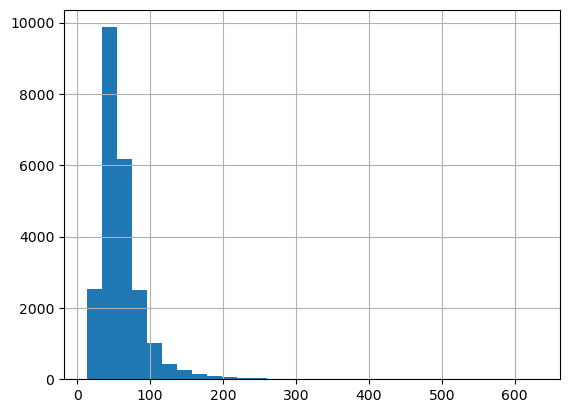

In [54]:
#построим гистограмму по общей площади
data['total_area'].hist(bins=30)

Большее количество квартир находится на площади от 20 до 80 квадратных метров, укрупним гистограмму, выбрав только интересующие нас значения в диапазоне. Квартиры площадью 100 метров встречаются примерно в 1000 объявлениях, при этом при увеличении метров частота таких объявлений значительно снижается.

<AxesSubplot:>

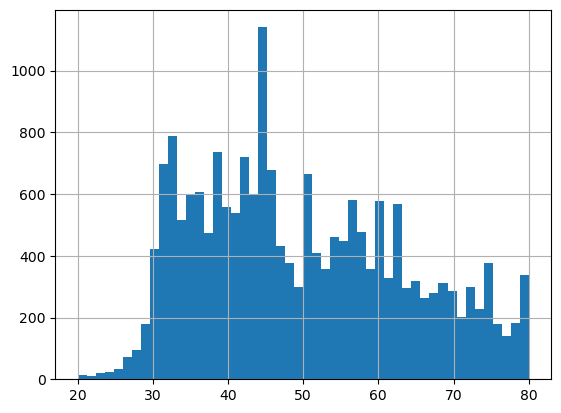

In [55]:
data['total_area'].hist(bins=50, range=(20, 80))

**Вывод по площади: наиболее  распространенной площадью являются квартиры в 45 квадратных метров. Самым популярным диапазоном площади квартир являются помещения от 30 до 52 квадратных метров, что может потенциально объяснено типовой застройкой городов в советский период (наличие "хрущевок", имеющих небольшую площадь), а также бОльшим спросом на такие квартиры среди немногодетных семей, которых подавляющее большинство в России, что в свою очередь побуждает застройщиков увеличивать количество небольшого жилья в домах.**

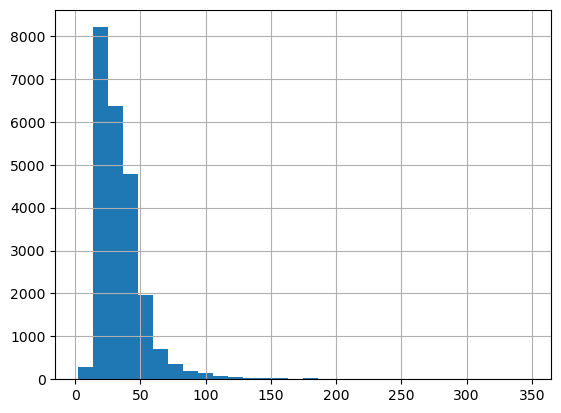

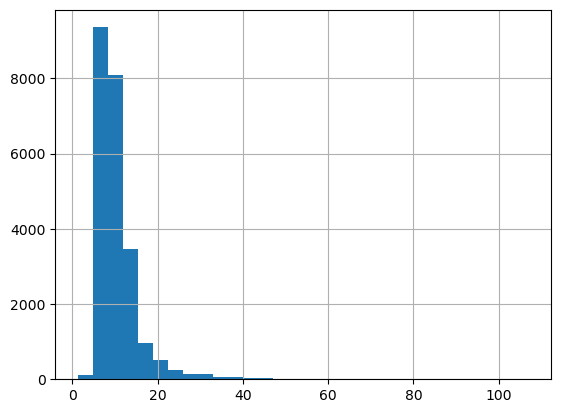

<AxesSubplot:>

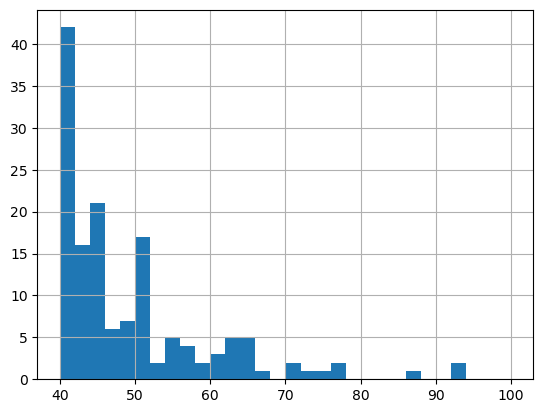

In [56]:
#построим гистограмму по жилой площади и площади кухни
data['living_area'].hist(bins=30)
plt.show()
data['kitchen_area'].hist(bins=30)
plt.show()
data['kitchen_area'].hist(bins=30, range=(40, 100))

In [57]:
#уточним как соотносятся средняя площадь кухни и общая площадь
data['kitchen_area'].mean()/data['total_area'].mean()


0.17210453296740202

In [58]:
#уточним как соотносятся средняя жилая площадь и общая площадь
data['living_area'].mean()/data['total_area'].mean()

0.5645566729781056

**Вывод по жилой площади и площади кухни: форма графиков по данным категориям сопоставима с графиком общей площади. При этом, жилая больше площади кухни, так как включает в себя коридоры и комнаты. Площадь кухни за редким исключением превышает отметку в 52 квадратных метра. В среднем площадь кухни занимает 17%, а жилая площадь 56% от общей площади помещений** 

<AxesSubplot:>

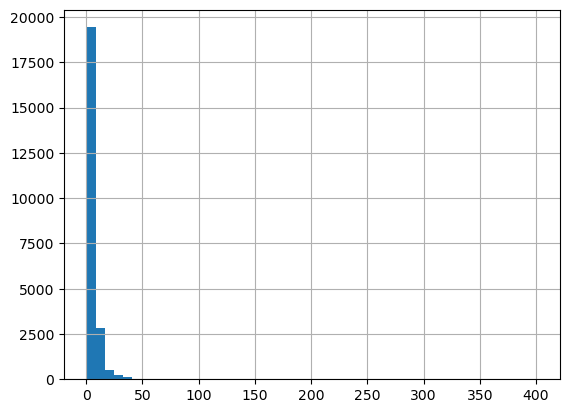

In [59]:
#построим гистограмму по цене объектов, но для удобства представления информации, доведем все значения до миллиона
data['last_price'] = data['last_price']/1000000
data['last_price'].hist(bins=50)


<AxesSubplot:>

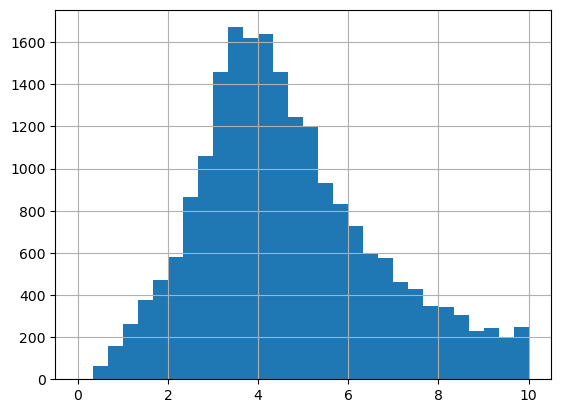

In [60]:
#рассмотрим пики значений по цене более подробно
data['last_price'].hist(bins=30, range=(0, 10))

In [61]:
data['last_price'].median()


4.65

**Вывод по цене: Наибольшее количество объявлений о продаже квартир находится в ценовом диапазоне от 0,5 млн.руб. до 5 млн.руб. Медианным значением по цене является 4.65 млн.руб.**

<AxesSubplot:>

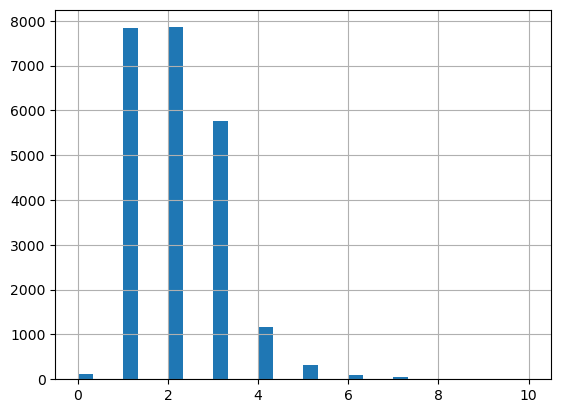

In [62]:
#построим гистограмму по количеству комнат
data['rooms'].hist(bins=30)

**Вывод по количеству комнат: в представленном датасете наибольшее количество объявлений относится к продаже 1 и 2-комнатных квартир. Реже встречаются квартиры с 3 комнатами, далее в зависимости от увеличения количества комнат уменьшается количество объявлений** 

<AxesSubplot:>

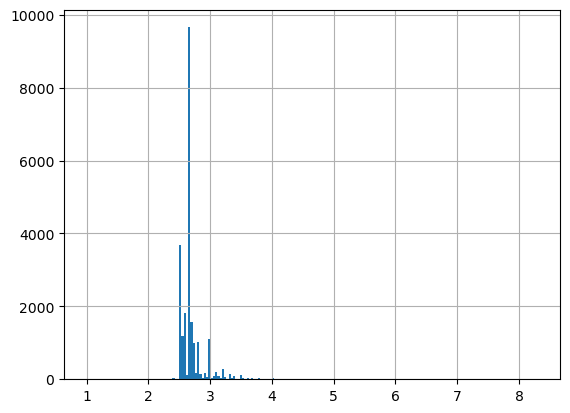

In [63]:
#построим гистограмму по высоте потолков
data['ceiling_height'].hist(bins=200)

<AxesSubplot:>

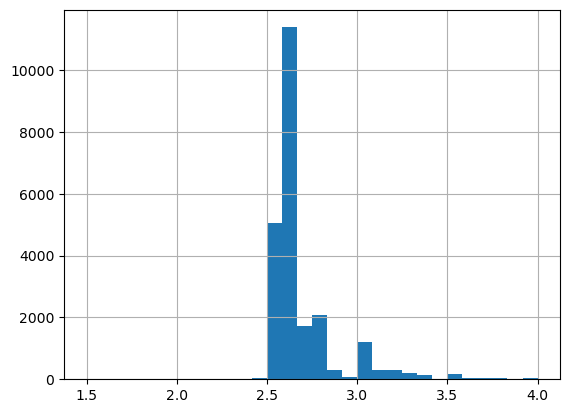

In [64]:
#посмотрим подробнее наиболее часто встречающиеся значения высот потолков
data['ceiling_height'].hist(bins=30, range=(1.5, 4))

**Вывод по высоте потолков: наиболее распространенное значение высоты потолков находится в диапазоне от 2,5 м до 3,1 м**

<AxesSubplot:>

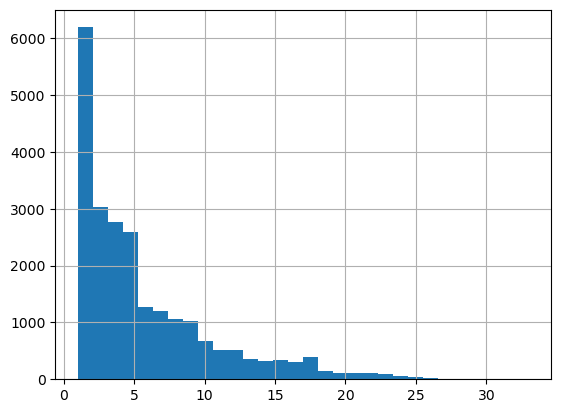

In [65]:
#построим гистограмму по этажам квартиры
data['floor'].hist(bins=30)

<AxesSubplot:>

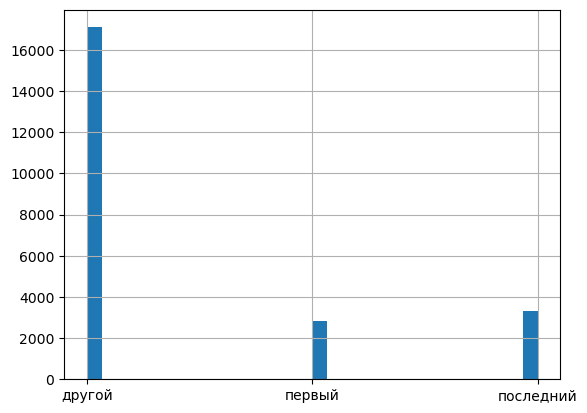

In [66]:
#рассмотрим также распределение по типам этажей
data['floor_category'].hist(bins=30)

<AxesSubplot:>

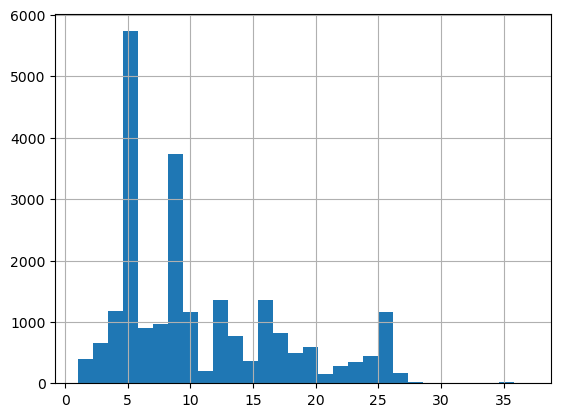

In [67]:
#построим гистограмму по общему количеству этажей
data['floors_total'].hist(bins=30)

**Вывод по этажам: Большинство недвижимости находится не на первом и не на последнем этажах, при этом большая часть объектов располагается в диапазоне от 2 до 5го этажа. Это может быть вызвано тем, что в России в подавляющем большинстве имеет место старая малоэтажная застройка (в среднем от 5 до 10 этажей). Небоскребы не являются частым явлением (по сравнению с густонаселенными городами Гонконг, Нью-Йорк, Дубай), чаще всего преобладает экстенсивная застройка - с расширением города по горизонтали, а не по вертикали.**

<AxesSubplot:>

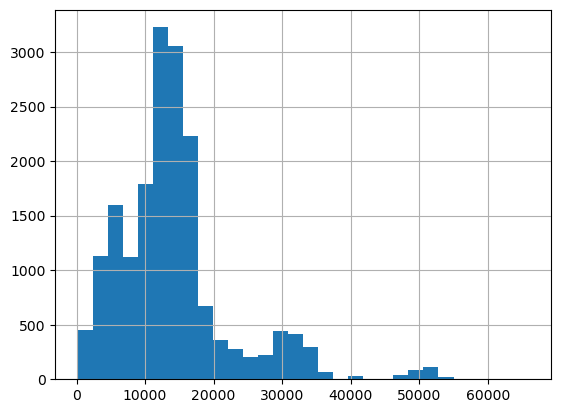

In [68]:
#построим гистограмму по расстоянию до центра города
data['cityCenters_nearest'].hist(bins=30)


In [69]:
#выведем названия населенных пунктов с расстоянием до центра города более 30 км
data[data['cityCenters_nearest'] > 30000]['locality_name'].head(20)

11      ломоносов
13       петергоф
14         пушкин
28         пушкин
33        колпино
42       петергоф
50         пушкин
67      ломоносов
72      кронштадт
74        колпино
107      павловск
120     кронштадт
126        пушкин
128     ломоносов
132      петергоф
135    сестрорецк
146    сестрорецк
153      петергоф
160        шушары
165    сестрорецк
Name: locality_name, dtype: object

**Вывод по расположению объектов от центра города: исходя из гистограммы удаленности объектов от центра города можно сказать, что большинство жилой недвижимости расположено в диапазоне 0-15 км от центра города, что в целом может быть объяснено масштабами городов. Небольшое увеличение зафиксировано по объектам, расположенным в 30 км от центра города. Можно отметить, что данные объекты находятся в пригороде Санкт-Петербурга и скорее всего, под расстоянием до центра подразумевается не расстояние до центра конкретного населенного пункта, а до центра Санкт-Петербурга.**

<AxesSubplot:>

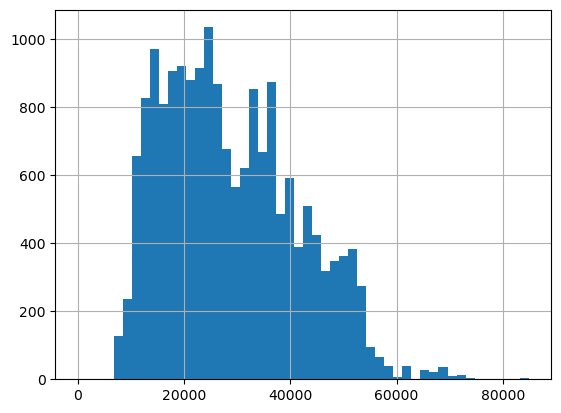

In [70]:
#построим гистрограмму удаленности до ближайшего аэропорта
data['airports_nearest'].hist(bins=50)

**Вывод по удаленности от аэропорта: справедливо было бы предположить, что зачастую аэропорты по соображениям безопасности и комфорта жителей выносят за пределы города, и, как следствие, основная масса жилой недвижимости была бы сосредоточена на отдалении от аэропортов. Данные гистограммы подтверждают догадки: большинство недвижимости находится как минимум на расстоянии от 10 км до аэропорта.**

<AxesSubplot:>

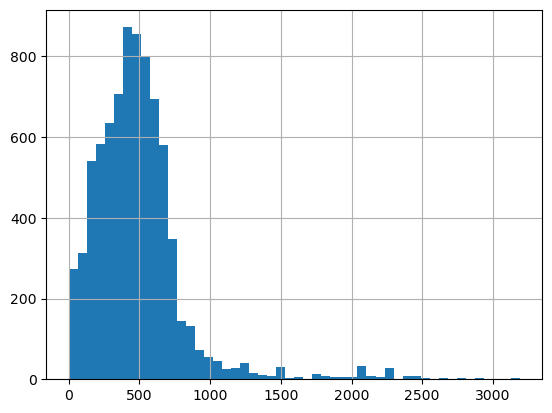

In [71]:
#построим гистрограмму удаленности до ближайших парков
data['parks_nearest'].hist(bins=50)

In [72]:
#рассчитаем среднюю удаленности от парков
data['parks_nearest'].mean()

490.41050119331743

**Вывод по удаленности от парков: в отличие от аэропортов, жилые массивы (и районы-кварталы :) расположены в основном недалеко от парков и зон реакреации. В нашем случае основная доля жилой недвижимости располагается не дальше, чем в 500 метрах от парка. Средние данные также подтверждают информацию из гистограммы - 490 м** 

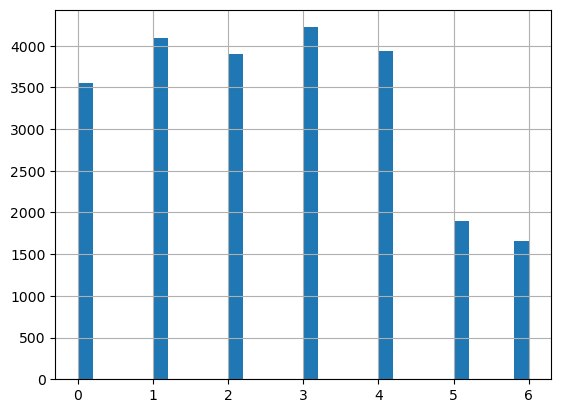

<AxesSubplot:>

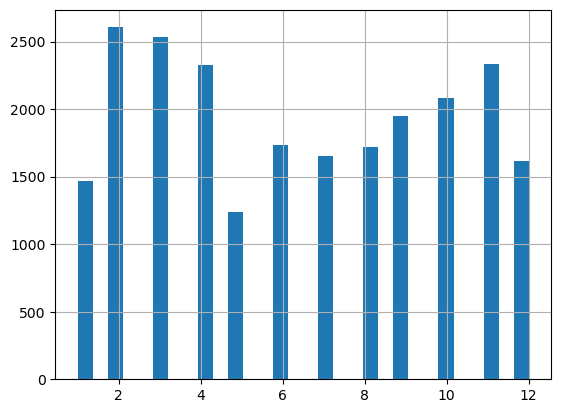

In [73]:
#рассмотрим распределение по дням и месяцам публикаций объявлений
data['day_of_publication'].hist(bins=30)
plt.show()
data['month_of_publication'].hist(bins=30)

**Вывод по дням недели и месяцам публикации объявления:**
- пик активности размещения объявления выпадает на будние дни в основном со вторника по четверг. В выходные же наблюдается минимальная активность. Возможно это связано из-за того, что в продавцы стараются размещать информацию в дни деловой активности для большего охвата аудитории, которая редко находится за компьютером в выходные дни
- наибольшая активность помесячно зафиксирована в феврале, марте, апреле. Затем активность размещения прекращается в летние месяцы (все уезжают на дачи, в отпуск и вопрос продажи квартиры становится не таким актуальным) и начинает снова расти ближе к зиме, достигая своего пика в ноябре. В декабре снова начинается провал возможно в связи с подготовкой к новогодним праздникам и закрытием первоочередных вопросов в конце года.

<AxesSubplot:>

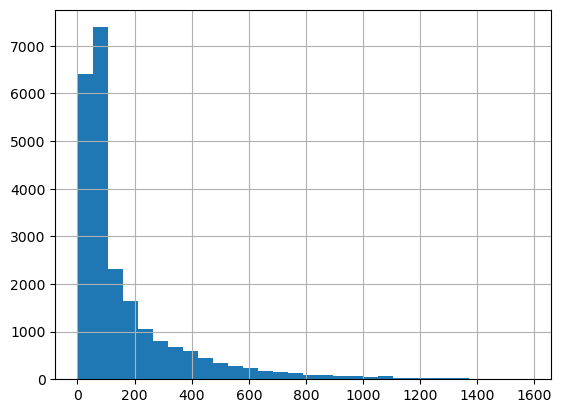

In [74]:
#рассмотрим продолжительность размещения объявления
data['days_exposition'].hist(bins=30)

In [75]:
#найдем медиану по дням размещения объявления
data['days_exposition'].median()

95.0

In [76]:
#найдем среднее по дням размещения объявления
data['days_exposition'].mean()

169.7256899664689

In [77]:
#посмотрим на распределение данных по времени размещения объявлений
data['days_exposition'].describe()

count    23262.000000
mean       169.725690
std        206.749285
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

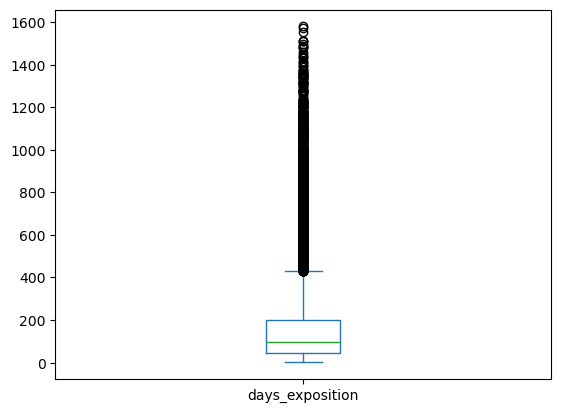

In [78]:
data['days_exposition'].plot(kind='box')
plt.show()

**Вывод по дням продажи: средняя продолжительность продажи составляет 169 дней (чуть меньше полугода), при этом основная доля продаж (75%) находится в диапазоне от 45 до 199 дней, что можно считать нормальным сроком продажи. Быстрой продажей будет являться значение меньше 45, самый минимальный срок размещения объявления - всего 1 день. Аномально долгим сроком продажи будет являться значение более 400 дней. Самая долгая продажа составила 1580 дней.**

In [79]:
#отберем столбцы, потенциально влияющие на финальную стоимость и найдем корреляцию между ними
data_pivot = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category', \
                          'day_of_publication', 'month_of_publication', 'year_of_publication', 'ceiling_height', \
                         'cityCenters_nearest_km']]

data_pivot.corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_of_publication,month_of_publication,year_of_publication,ceiling_height,cityCenters_nearest_km
last_price,1.000000,0.695963,0.567753,0.488717,0.389870,-0.002834,-0.001940,-0.048272,0.326327,-0.236329
total_area,0.695963,1.000000,0.878259,0.574814,0.755279,-0.007326,0.004321,-0.080333,0.384910,-0.234560
living_area,0.567753,0.878259,1.000000,0.412503,0.826090,-0.010460,0.001784,-0.075365,0.358122,-0.226994
kitchen_area,0.488717,0.574814,0.412503,1.000000,0.264362,-0.009017,0.003035,-0.056788,0.311466,-0.187512
rooms,0.389870,0.755279,0.826090,0.264362,1.000000,-0.007132,-0.003143,-0.053541,0.237903,-0.185614
day_of_publication,-0.002834,-0.007326,-0.010460,-0.009017,-0.007132,1.000000,0.009684,-0.001598,-0.020439,0.009512
month_of_publication,-0.001940,0.004321,0.001784,0.003035,-0.003143,0.009684,1.000000,-0.270927,-0.001805,-0.009350
year_of_publication,-0.048272,-0.080333,-0.075365,-0.056788,-0.053541,-0.001598,-0.270927,1.000000,-0.054287,0.030225
ceiling_height,0.326327,0.384910,0.358122,0.311466,0.237903,-0.020439,-0.001805,-0.054287,1.000000,-0.282226
cityCenters_nearest_km,-0.236329,-0.234560,-0.226994,-0.187512,-0.185614,0.009512,-0.009350,0.030225,-0.282226,1.000000


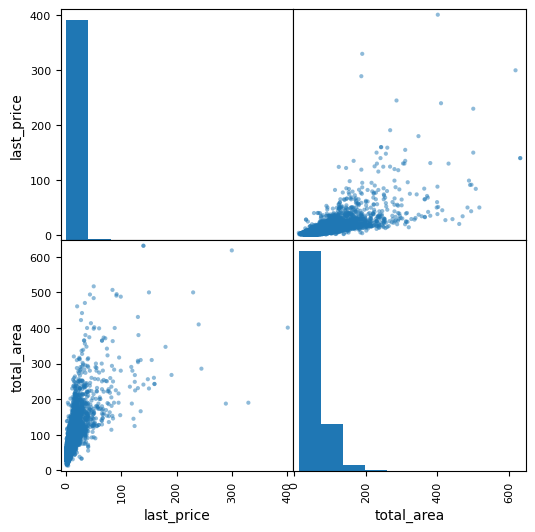

In [80]:
#построим матрицу рассеяния для общей площади
data_pivot = data.loc[:, ['last_price', 'total_area']]
pd.plotting.scatter_matrix(data_pivot, figsize=(6, 6))
plt.show()

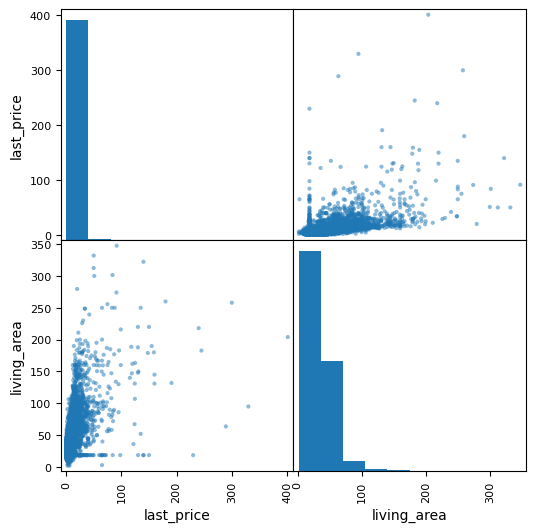

In [81]:
#построим матрицу рассеяния для жилой площади
data_pivot = data.loc[:, ['last_price', 'living_area']]
pd.plotting.scatter_matrix(data_pivot, figsize=(6, 6))
plt.show()

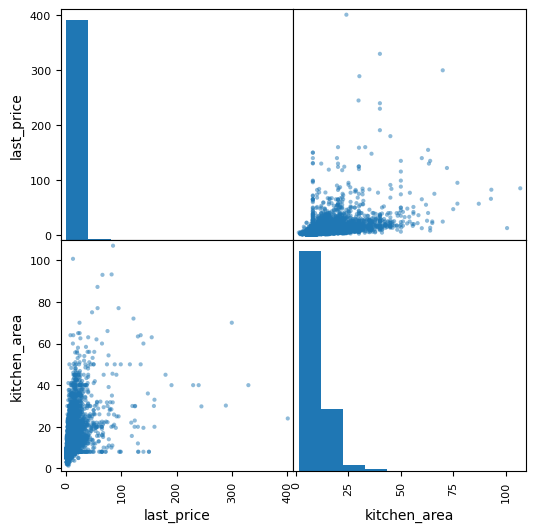

In [82]:
#построим матрицу рассеяния для площади кухни
data_pivot = data.loc[:, ['last_price', 'kitchen_area']]
pd.plotting.scatter_matrix(data_pivot, figsize=(6, 6))
plt.show()

По матрице рассеивания наблюдается четкая положительная связь общей площади и жилой площади. График же связи жилой площади и площади кухни имеет густую концентрацию в начале графика, а потом значительно рассеивается к концу, что говорит о несильной взаимосвязи между данными факторами. 

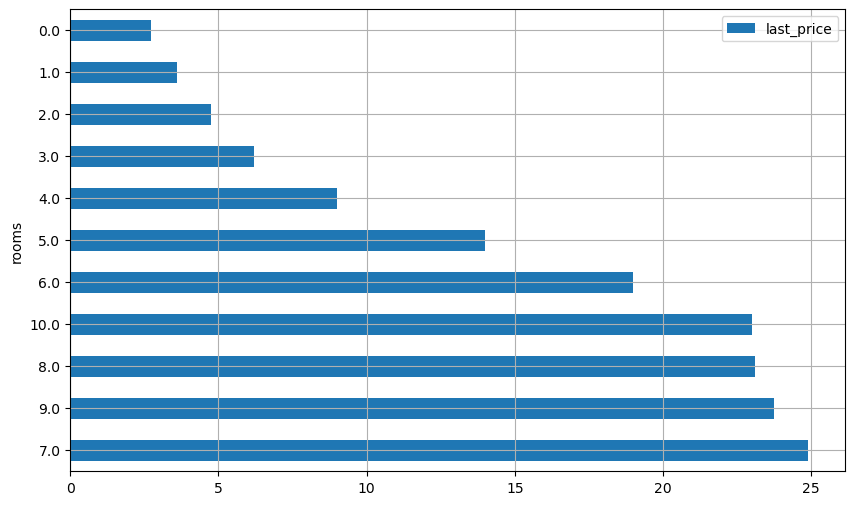

In [83]:
#построим график по зависимости цены от количества комнат
(data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 6), grid=True)
)
plt.show()

Результаты графика довольно логичные: чем больше комнат (а, следовательно в большинстве случаев это ведет к увеличению метража), тем больше возрастает цена. Аномалии возникают при большом количестве комнат (более 5). Скорее всего в данном случае речь ведется о нетиповых дизайнерских проектах, в которых на формирование цены влияет не только метраж, но и оформление, планировка и иные факторы, не указанные в данном исследовании.

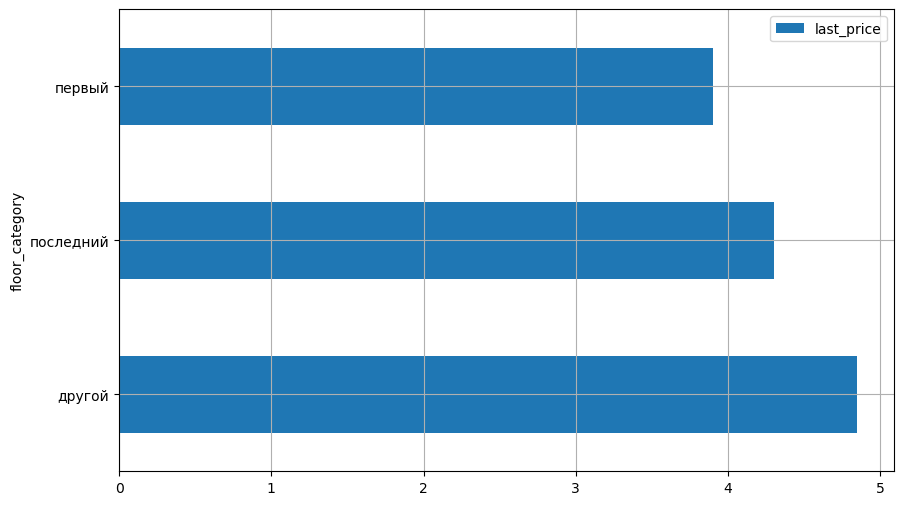

In [84]:
#построим график по зависимости цены от категории этажа
(data
    .pivot_table(index = 'floor_category', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 6), grid=True)
)
plt.show()

Стоимость недвижимости на первых этажах значительно ниже, чем цена жилья на других этажах. Чуть дороже первого этажа последний этаж, но также не является самым дорогим среди представленных объявлений.

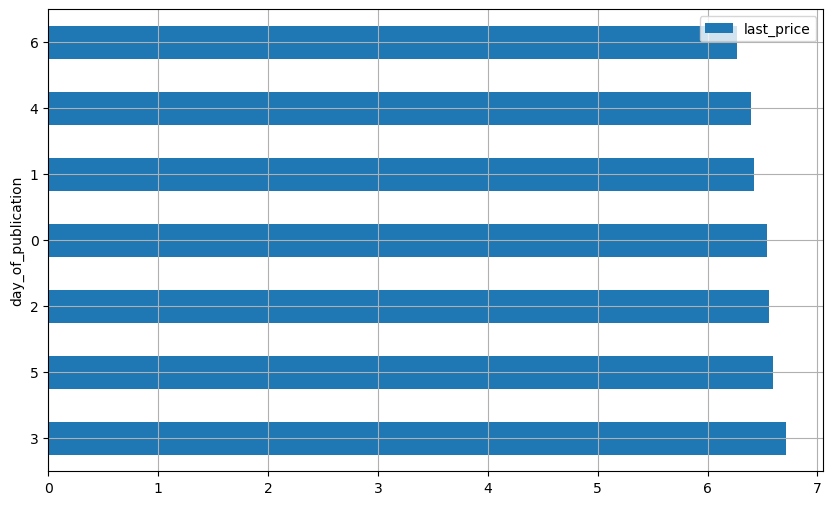

In [85]:
#построим график по зависимости цены от дня размещения объявления
(data
    .pivot_table(index = 'day_of_publication', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 6), grid=True)
)
plt.show()

Цена в объявлениях, размещенных в субботу, превышает средний уровень цен в остальные дни. В четверг же, наоборот, стоимость размещенной недвижимости сравнительно ниже, чем в другие дни. 

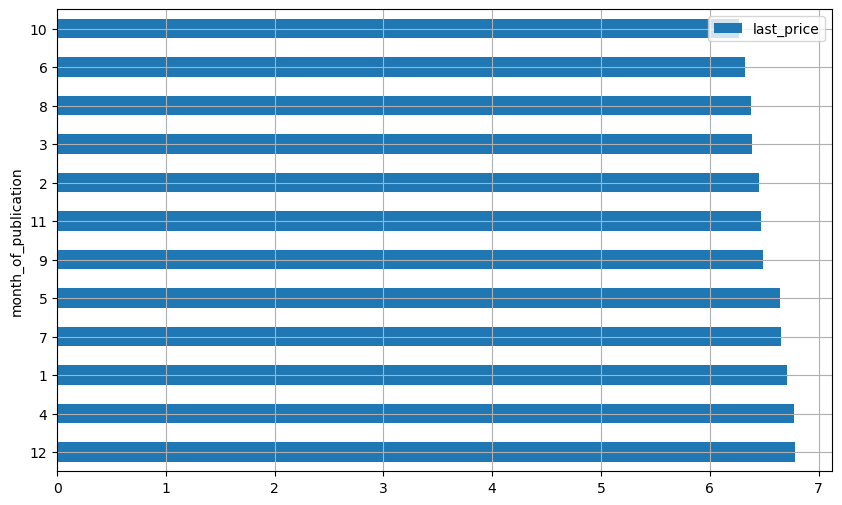

In [86]:
#построим график по зависимости цены от месяца размещения объявления
(data
    .pivot_table(index = 'month_of_publication', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 6), grid=True)
)
plt.show()

Топ-3 месяца размещения дорогой недвижимости: декабрь, апрель и январь. Возможно это связано с тем, что на данные месяцы приходится пик активности по размещению объявлений и в том числе в выборку попадают и дорогие предложения о продаже элитной недвижимости. 

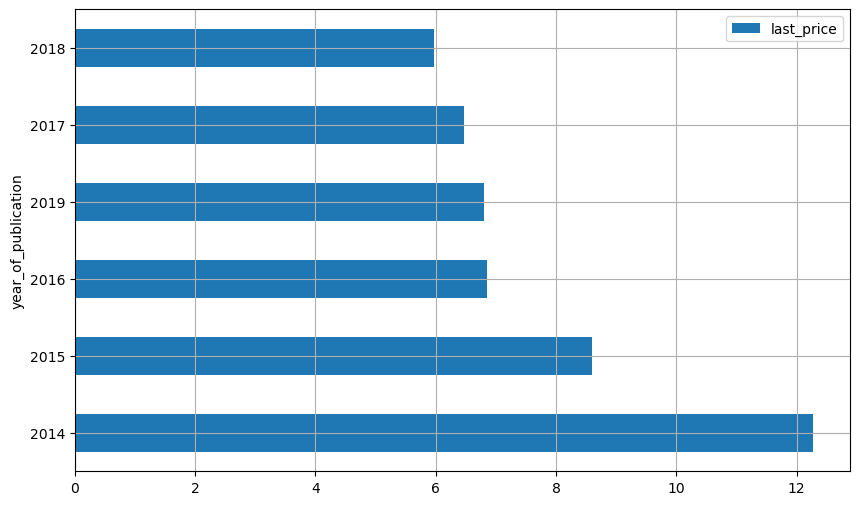

In [87]:
#построим график по зависимости цены от года размещения объявления
(data
    .pivot_table(index = 'year_of_publication', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 6), grid=True)
)
plt.show()

Наиболее дорогая недвижимость была зафиксирована в 2014 году, возможно из-за санкций и экономического кризиса, когда большинство людей старалось сохранить свои сбережения вложением в недвижимость. Далее стоимость недвижимости пошла на спад в связи с нормализацией рынка и введением льготной ипотеки. До 2019 года стоимость недвижимости в размещенных объявлениях не отличалась особой динамикой. 

**Согласно данным по корреляции основных факторов с ценой продажи объекта наблюдается следующее:**
- наибольшая положительная связь с ценой объекта выявлена с общей площадью
- в свою очередь на общую площадь значительное влияние оказывает жилая площадь и чуть меньшее площадь кухни (так как жилая площадь в большинстве случаев больше площади кухни)
- связь с количество комнат выявлена несильная, возможно в связи с тем, что количество комнат является очень непостоянным фактором, например, квартира в 55 кв м может быть как однокомнатной, так и трехкомнатной (при сильном желании ее владельцев), поэтому формирование цены происходит все же за квадратный метр, нежели чем за внутреннее разделение по комнатам. Однако цена за объекты до 5 комнат растет пропорционально их количеству.
- интересно, что с днем, месяцем и годом публикации практически не обнаружено связи
- также небольшая отрицательная взаимосвязь обнаружена с удаленностью от центра: чем квартира находится дальше от центра, тем меньше ее цена
- недвижимость на нижних этажах дешевле относительно жилья на других этажах, самым дорогостоящим является последний этаж (возможно из-за потенциальных панорамных видов или отсутствия соседей сверху)
- общая стоимость жилья с 2015 года имеет динамику к снижению, вероятнее в связи с преодолением экономического кризиса 2014 года

In [88]:
meter_price =  data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median', 'total_area':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)
meter_price['price_for_meter'] = meter_price['last_price']*1000000 / meter_price['total_area'] #посчитаем стоимость в руб за кв м
meter_price.sort_values(by = 'price_for_meter', ascending = False)

,balcony,last_price,total_area,price_for_meter
locality_name,,,,
санкт-петербург,15475,5.5200,55.0,100363.636364
пушкин,369,5.1800,53.2,97368.421053
кудрово,447,3.9500,41.0,96341.463415
парголово,326,4.1150,43.0,95697.674419
мурино,546,3.4975,38.2,91557.591623
шушары,435,3.9900,50.5,79009.900990
колпино,336,3.6000,50.0,72000.000000
гатчина,302,3.0850,45.0,68555.555556
всеволожск,391,3.4500,53.6,64365.671642


**Вывод по стоимости жилья в населенных пунктах: самый дорогой квадратный метр зафиксирован в Санкт-Петербурге (101 тыс.руб.). Затем с незначительной разницей располагаются Пушкин (97 тыс.руб./кв.м) и Кудрово (96,3 тыс.руб./кв.м). Стоит отметить, что шансы найти недвижимость по низкой цене среди самых распространненых локаций наиболее представлены в Выборге - количество объявлений 234 при этом цена значительно ниже - 57,2 тыс.руб. за кв м.**

In [89]:
#вычислим стоимость каждого километра от центра Санкт-Петербурга
#выделим строки, относящиеся к Санкт-Петербургу
data_for_spb = data.query('locality_name == "санкт-петербург"')

In [90]:
#построим сводную таблицу по километрам и средней ицене
pivot_for_spb = data_for_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
pivot_for_spb

,last_price
cityCenters_nearest_km,
0.0,15.90000
1.0,11.49000
2.0,10.00000
3.0,8.42000
4.0,9.25000
5.0,9.48300
6.0,8.90000
7.0,7.80000
8.0,7.40000


In [91]:
#в среднем стоимость при удалении от центра снижается, однако на 27 км находится выброс - средняя стоимость недвижимости равна 8,3 млн.руб.
data_for_spb.query('cityCenters_nearest_km == 27') #выводим объекты, находящиеся на 27 км от центра Санкт-Петербурга

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_nearest_km
748,13.0,14.35,74.0,2017-11-28,2.0,3.13,5.0,30.0,3.0,True,...,0.0,NaN,128.0,normal,193918.918919,1,11,2017,другой,27.0
5961,6.0,2.25,32.0,2018-02-27,1.0,2.65,2.0,16.5,2.0,True,...,0.0,NaN,178.0,small,70312.500000,1,2,2018,последний,27.0


Всего 2 объекта стоимостью 14,35 млн руб. и 2.25 млн руб. Возможно, что квартира за 14 млн руб. обладает каким-то отличительными характеристиками, чем оправдывается ее стоимость, тем не менее, будем принимать во внимание, что всего 2 позиции не могут сформировать точного вывода о стоимости жилья в удалении 27 км от Санкт-Петербурга.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

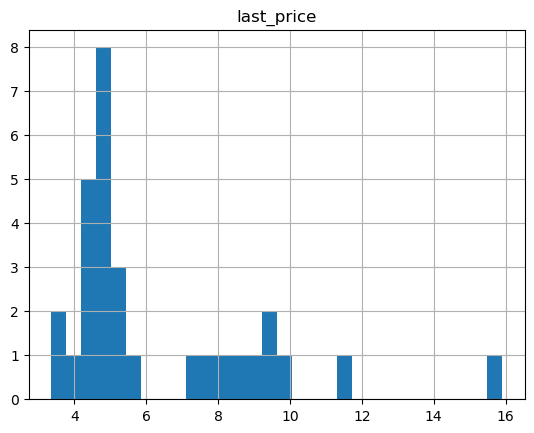

In [92]:
#построим график цены и удаленности от центра
pivot_for_spb.hist(bins=30)

**Вывод по удаленности квартир от центра и стоимости каждого километра:**
- наиболее дорогие квартиры расположены в непосредственно центре - их средняя стоимость около 30 млн руб. 
- при удаленности от центра всего на 1-2 км происходит значительное снижение в стоимости жилья практически на 30% до 17-21 млн руб.
- начиная с 9 км от центра стоимость жилья постепенно снижается с каждым километром с 7 млн руб. до 4 млн руб в самых отдаленных концах города (до 29 км). 


### Общий вывод

В ходе анализа были обработаны пропуски в данных, выявлены аномальные значения, проработаны данные о недвижимости в 293 населенных пунктах, рассмотрены факторы, влияющие на их рыночную стоимость.

По результатам анализа можно сделать следующие выводы и рекомендации:
- были выявлены пропуски в названии населенных пунктов, удаленности от аэропорта и городского центра, а также парков и прудов, высота потолков, количество балконов и т.п. Для устранения пробелов в данных в дальнейшем рекомендуется в системе Яндекс.Недвижимость добавить функционал по обязательному заполнению всех ячеек (невозможность опубликовать объявление без полного заполнения всех данных), также для удобства пользователей можно сделать выпадающие списки по адресам (в дальнейшем для более точного определения геолокации).
- аномальные значения в данных могли также возникнуть из-за невнимательности авторов объявлений, что может потенциально решиться либо автозаполнением, либо проверкой данных на корректность. Например, ячейка по высоте потолков может стоять с автопроверкой соответствия критерию "не более 10м"
- самое типичное объявление выглядит так: квартира 1-2 комнаты, общей площадью 45 кв.м., находится не на первом и не на последнем этаже (со 2 по 5 этаж). Так как в среднем площадь кухни занимает 17%, а жилая площадь 56% от общей площади помещений, то типичная кухня будет площадью 7,65 кв м, типичная жилая зона 25,2 кв м. Высота потолков от 2,5 до 3,1 метра. Удобное расположение квартиры - вблизи парков (не более 0,5 км) и далеко от шумного аэропорта (более 10 км), при этом находится в автомобильной доступности до центра города - в радиусе 15 км. Размещено такое объявление было скорее всего в один из четвергов февраля, что позволило автору продать квартиру в среднем менее чем за 200 дней.
- самый дорогой квадратный метр зафиксирован в Санкт-Петербурге (101 тыс.руб.). Затем с незначительной разницей располагаются Пушкин (97 тыс.руб./кв.м) и Кудрово (96,3 тыс.руб./кв.м). Стоит отметить, что шансы найти недвижимость по низкой цене среди самых распространненых локаций наиболее представлены в Выборге - количество объявлений 234 при этом цена значительно ниже - 57,2 тыс.руб. за кв м.
- при поиске квартиры в Санкт-Петербурге стоит отметить особое внимание удаленности от центра: так, квартиры находящиеся в 1-2 км от центра, будут в среднем в три раза дороже, чем в квартиры в радиусе от 7 км от центра. 
- значительное связь с общей стоимостью квартиры оказывает ее площадь, все остальные факторы имеют меньшую связь с данным показателем и являются второстепенными. Но для оценки степени влияния требуется учитывать все факторы, а для этого необходимо построение отдельной модели с выявлением влияния каждого фактора на общую стоимость жилья. 
- также на формирование стоимости оказывает влияние фактор этажа - так, недвижимость на первом этаже будет значительно дешевле, чем жилье на других этажах и тем более последним (он является самым дорогим среди всех трех категорий).